# Techno Industries Inc.

Techno Industries Inc. a leader of manufacturing different equipment components, has observed that market demand
has been strong over the past few years with growth averaging 6.9% Year-on-Year.
As a Fortune 500 corporation, this good growth has led the company to expand their operation and distribution centers across 48 states in the US. With very good growth rates and lower barriers to entry due to government regulation, this has attracted a lot of new companies that increase competition drastically. New businesses are offering better and optimized delivery for components, and some companies have started using machine learning and artificial intelligence to create better technology and lower the production costs for existing components.
After Techno Industries Inc. lost several top long-term customers that brought 11% of the company's revenue, management decided to ceate short-term plan.
If this problem continues, the Techno Industries Inc. market share and potential customer-base will be at risk, also it will indicate a potential risk in the company’s ability to make dividend payments to shareholders if losses are too big.
Techno Industries Inc. currently includes 6 primary industries and 11 different types of components.
Management needs an immediate short-term action plan to address the loss of customers and protect the existing market share.

**The main goal of this project is to determine in which type of components Techno Industries Inc. should invest**

What number of customers in each segment purchase this specific component?     
What is the revenue breakdown per industry?    
Is there any seasonality in industry sales?     
If ther is seasonality in industry, wich product in that industry has seasonality?          
What is the geographic distribution of each segment?     
Which segment yields the highest average profit margin?    
Distribution of industries among the orders?    
Which product has the the highest profit?      
Which product has the lowest profit?   
Which product has the highest growth potential?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

Loading data and exploring dataset.

In [76]:
df = pd.read_excel(r'Techno Industries Inc. Data.xlsx')

In [77]:
df.head().T

,0,1,2,3,4
Date,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00
Customer ID,10318,10173,10217,10021,10041
Product,"LCD, LED, OLED displays",Actuators,Fuse,Resistors,Light Emitting Diode (LED)
State,Massachusetts,New Hampshire,Maine,Maine,New Jersey
Zip Code,2109,3084,4250,4544,7023
Business Type,Industrial,Industrial,Aerospace,Agriculture,Aerospace
Cost (per unit),2.06,0.55,2.215,1.575,1.725
Price (per unit),8.2,4.62,2.4,4.79,1.85
Quantity,33.0,22.0,11.0,479.0,510.0
Revenue (total),270.6,101.64,26.4,2294.41,943.5


In [4]:
df.describe()

,Customer ID,Zip Code,Cost (per unit),Price (per unit),Quantity,Revenue (total),Cost (total)
count,45516.000000,45516.000000,45516.000000,45516.000000,45516.000000,45516.000000,45516.000000
mean,10159.596164,52364.166447,2.632562,7.455079,212.357523,918.014754,375.560081
std,132.730140,31658.902561,3.654429,10.237572,1874.468932,4325.882521,2226.750648
min,10001.000000,1001.000000,0.550000,0.020000,0.000000,0.000000,0.000000
25%,10042.000000,19969.500000,1.060000,3.300000,10.000000,54.000000,17.250000
50%,10128.000000,53012.500000,1.725000,4.500000,36.000000,187.200000,60.980000
75%,10250.000000,83531.250000,2.215000,6.700000,115.000000,584.800000,227.065625
max,10544.000000,99403.000000,19.100000,100.810000,222317.000000,397947.430000,235656.020000


In [5]:
df.dtypes

Date                datetime64[ns]
Customer ID                  int64
Product                     object
State                       object
Zip Code                     int64
Business Type               object
Cost (per unit)            float64
Price (per unit)           float64
Quantity                   float64
Revenue (total)            float64
Cost (total)               float64
dtype: object

# Data Wrangling

In [6]:
df.isna().sum()

Date                0
Customer ID         0
Product             0
State               7
Zip Code            0
Business Type       0
Cost (per unit)     0
Price (per unit)    0
Quantity            0
Revenue (total)     0
Cost (total)        0
dtype: int64

In [7]:
df[df.isnull().any(axis=1)]

,Date,Customer ID,Product,State,Zip Code,Business Type,Cost (per unit),Price (per unit),Quantity,Revenue (total),Cost (total)
111,2015-01-01,10044,Circuit breakers,NaN,88013,Transportation,2.490,4.50,2.0,9.00,4.980
7596,2015-03-03,10468,Circuit breakers,NaN,88013,Industrial,2.490,4.95,17.0,84.15,42.330
15534,2015-05-05,10044,"LCD, LED, OLED displays",NaN,88013,Transportation,2.060,7.20,107.0,770.40,220.420
18221,2015-05-26,10468,"LCD, LED, OLED displays",NaN,88013,Industrial,2.060,4.95,6.0,29.70,12.360
29380,2015-08-24,10468,Thermostat,NaN,88013,Industrial,15.245,61.74,5.0,308.70,76.225
34797,2015-10-06,10044,Thermostat,NaN,88013,Transportation,15.245,46.20,16.0,739.20,243.920
36326,2015-10-18,10044,Resistors,NaN,88013,Transportation,1.575,4.50,2.0,9.00,3.150


Zip Code 88013 is belongs to Las Cruces, New Mexico.    
I will fill missing states with New Mexico.

In [8]:
df.fillna('New Mexico', inplace=True)

In [9]:
df.isna().sum()

Date                0
Customer ID         0
Product             0
State               0
Zip Code            0
Business Type       0
Cost (per unit)     0
Price (per unit)    0
Quantity            0
Revenue (total)     0
Cost (total)        0
dtype: int64

Changing datatype of column QUANTITY from float to int.

In [10]:
df['Quantity'] = df['Quantity'].astype(int)

In [11]:
df.dtypes

Date                datetime64[ns]
Customer ID                  int64
Product                     object
State                       object
Zip Code                     int64
Business Type               object
Cost (per unit)            float64
Price (per unit)           float64
Quantity                     int32
Revenue (total)            float64
Cost (total)               float64
dtype: object

In [12]:
df.head().T

,0,1,2,3,4
Date,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00
Customer ID,10318,10173,10217,10021,10041
Product,"LCD, LED, OLED displays",Actuators,Fuse,Resistors,Light Emitting Diode (LED)
State,Massachusetts,New Hampshire,Maine,Maine,New Jersey
Zip Code,2109,3084,4250,4544,7023
Business Type,Industrial,Industrial,Aerospace,Agriculture,Aerospace
Cost (per unit),2.06,0.55,2.215,1.575,1.725
Price (per unit),8.2,4.62,2.4,4.79,1.85
Quantity,33,22,11,479,510
Revenue (total),270.6,101.64,26.4,2294.41,943.5


# Exploratory Data Analysis

## Distribution of industries among the orders? 

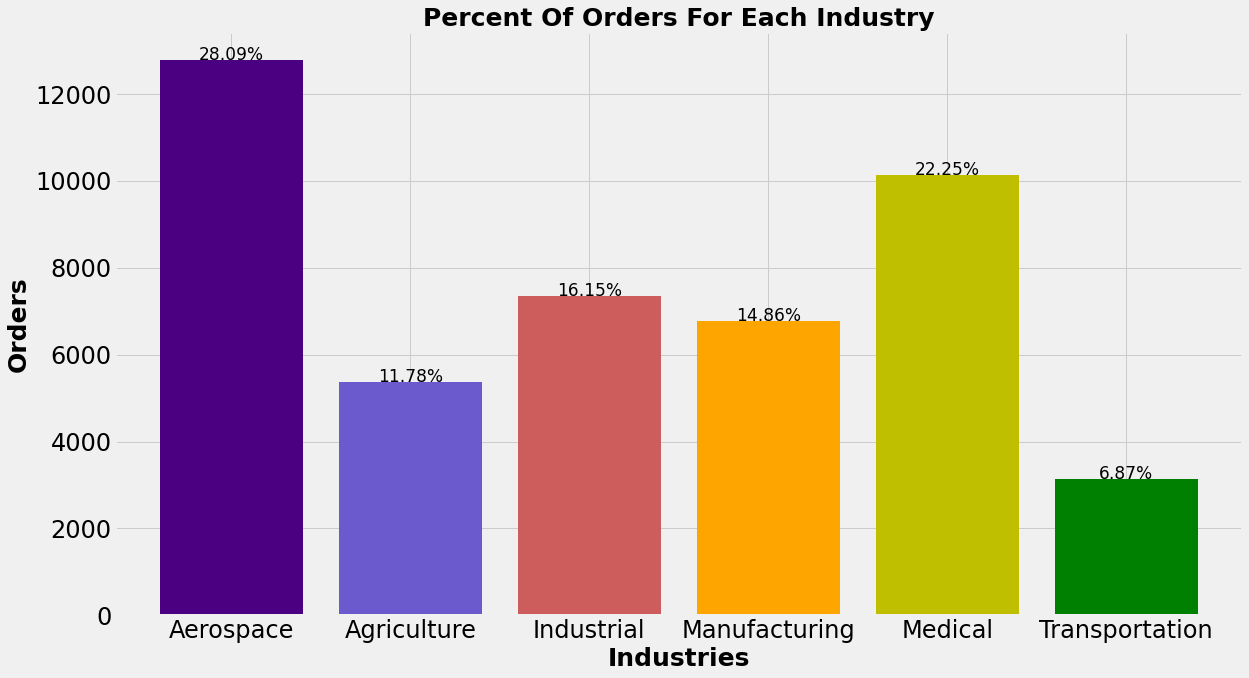

In [13]:
plt.style.use('fivethirtyeight')

total = len(df['Business Type'])

color = ['indigo','slateblue', 'indianred','orange','y','g']
ax =  df.groupby(['Business Type',])['Customer ID'].count().plot.bar(color = color,figsize = (18,10), width = 0.8)


for h in ax.patches:
    height = h.get_height()
    ax.text(h.get_x() + h.get_width() / 2., height + 3,'{:1.2f}'.format((height/total)*100) + '%',
            ha="center",size=17)


plt.yticks(size = 24)
plt.xticks(size = 24)
plt.xticks(rotation = 0) 

plt.xlabel('Industries', size = 25, weight='bold')
plt.ylabel('Orders', size = 25, weight='bold')
plt.title('Percent Of Orders For Each Industry', size = 25,weight = 'bold');

I can see that about 50% of all the industries belongs to the **Aerospace** and **Medical** industries.       
But the biggest chunk belongs to the **Aerospace** industry.
On the other end **Transportation** has the smallest chunk among all industries that Techno Industries Inc. workin in.

Let's check distribution of components among the orders.

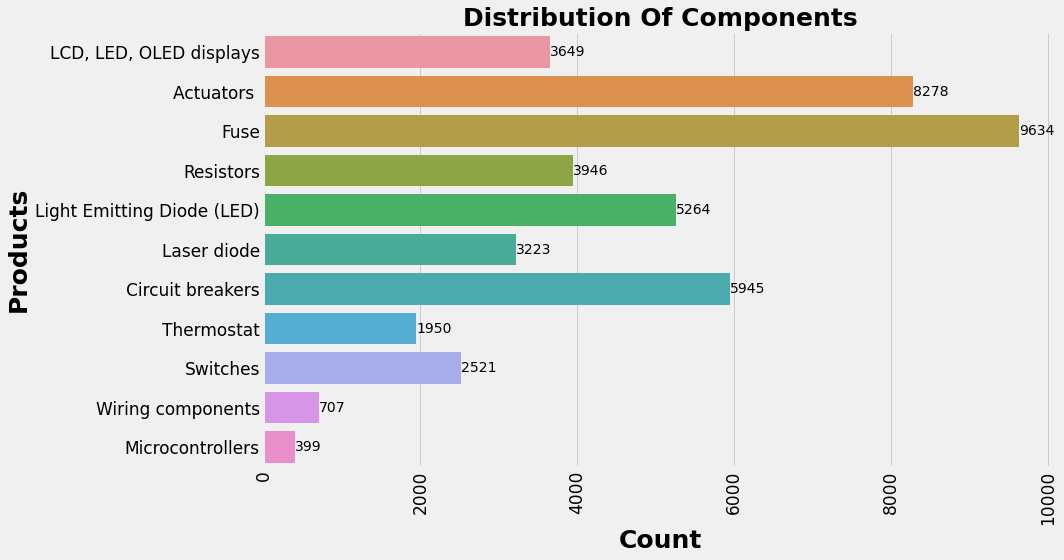

In [14]:
plt.figure(figsize=(15,8))

ax = sns.countplot(y ='Product', data=df)
for bars in ax.containers:
    ax.bar_label(bars)

plt.yticks(size = 17)
plt.xticks(size = 17)
plt.xlabel('Count', size = 25, weight = 'bold')
plt.xticks(rotation=90)
plt.ylabel('Products', size = 25, weight = 'bold')
plt.title('Distribution Of Components', size = 25, weight = 'bold')
plt.tight_layout()

**Actuators** and **Fuses** the biggest sellers among all the components in all the industry following by **Circuit breakers** and **Light Emitting Diode (LED)**    
**Microcontrollers** and **Wiring** components has the list of orders.

## What number of customers in each segment that purchased this specific component?

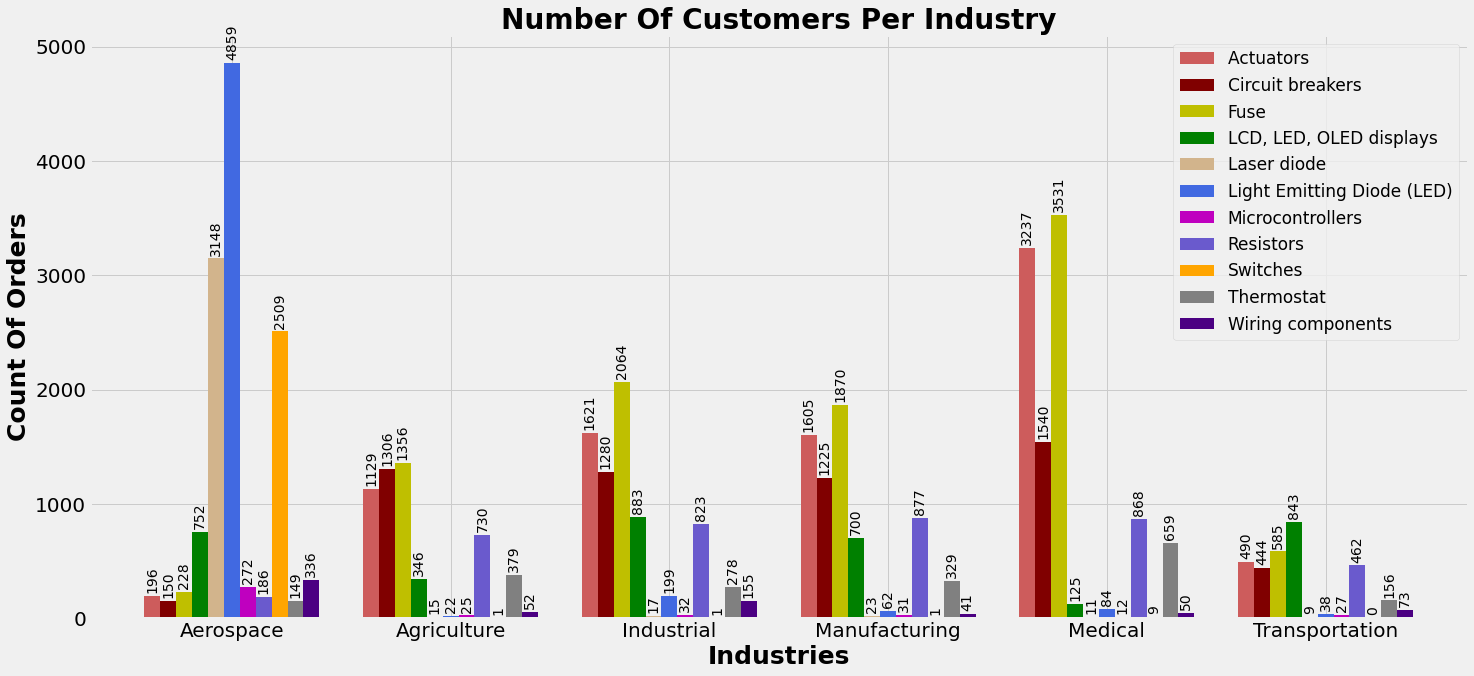

In [15]:
plt.style.use('fivethirtyeight')

color = ['indianred','maroon','y','g','tan','royalblue', 'm', 'slateblue','orange', 'gray', 'indigo']
ax = df.groupby(['Business Type', 'Product'])['Customer ID'].count().unstack().plot.bar(legend=True,color = color,
                                                                                     figsize=(22,10), width=0.8)

for bars in ax.containers:
    ax.bar_label(bars, padding=3, rotation=90)

plt.yticks(size = 20)
plt.xticks(size = 20)
plt.xticks(rotation = 0) 

plt.legend(fontsize=17)

plt.xlabel('Industries', size = 25, weight='bold')
plt.ylabel('Count Of Orders', size = 25, weight='bold')
plt.title('Number Of Customers Per Industry', size = 28, weight='bold');
plt.show()

As I can see the biggest number of customers purchased **Light Emitting Diode (LED)** from **Aerospace** industry.      
Be even more precise, almost all the orders for **Light Emitting Diode (LED)** came through **Aerospace** industry.                 
Also some of the industries has extremely low or even zero number of ordered for some components, for example **Transportation** industry has zero **Switches**
Looks like **Microcontrollers** has the smallest number of orders.

## What is the revenue breakdown per industry?

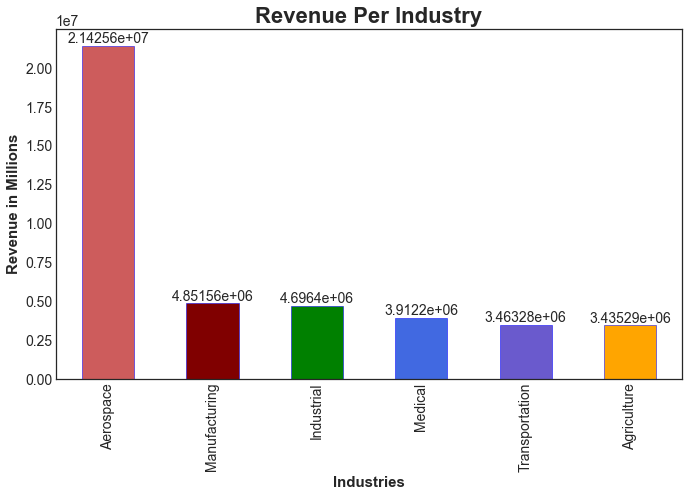

In [16]:
plt.style.use('seaborn-white')

plt.figure(figsize=(10,6))

color = ['indianred','maroon','g','royalblue', 'slateblue','orange']
ax = df.groupby('Business Type')['Revenue (total)'].sum().sort_values(ascending=False).plot(kind = 'bar',
                                                                                       color = color ,edgecolor='blue')

for bars in ax.containers:
    ax.bar_label(bars)

plt.xlabel('Industries', size = 15, weight='bold')
plt.ylabel('Revenue in Millions', size = 15, weight='bold')
plt.title('Revenue Per Industry', size = 22, weight='bold');

So far **Aerospace** have been the industry with the biggest number of orders and as I can see the **Aerospace** brings the most  revenue than the other industries all together.

## Is there any seasonality in industry sales?

Creating column 'Month' to get only month names, for seasonality plot.

In [17]:
df['Month'] = pd.to_datetime(df['Date']).dt.month_name()

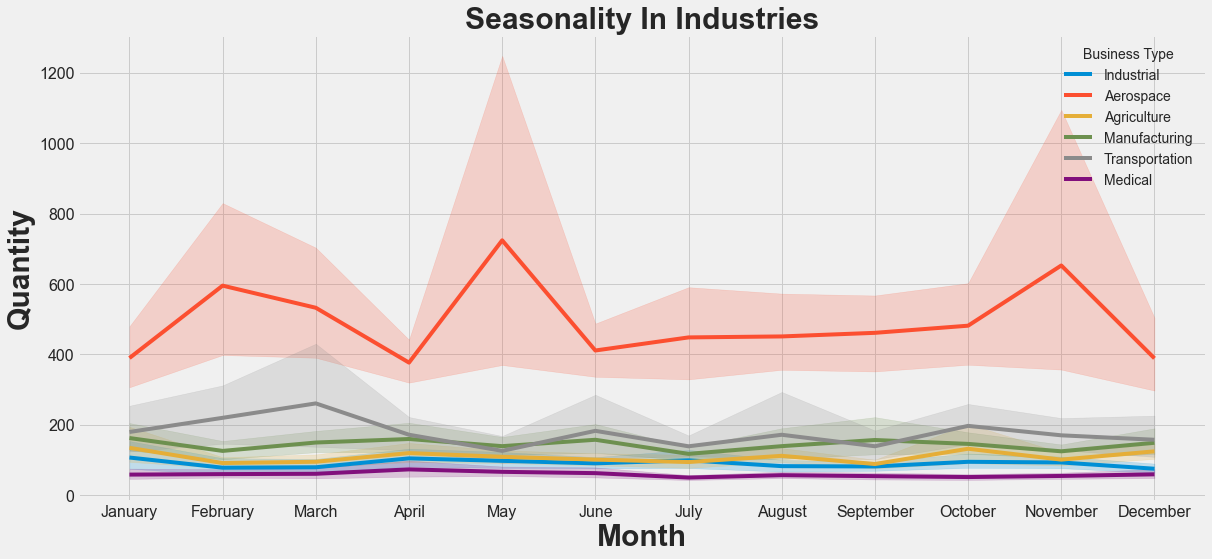

In [18]:
plt.style.use('fivethirtyeight')


y = df['Quantity']
x = df['Month']
hue = df['Business Type']

plt.figure(figsize=(18,8))
ax = sns.lineplot(x = x, y = y, data = df, hue = hue)

plt.yticks(size = 16)
plt.xticks(size = 16)
plt.xlabel('Month', size = 30, weight = 'bold')
plt.ylabel('Quantity', size = 30, weight = 'bold')
plt.title('Seasonality In Industries', size = 30, weight='bold');

**Aerospace** industry has sign of seasonality.

#### Let's check which product **Aerospace** industry has seasonality.
I am going to separate **Aerospace** industry from other industries.

In [19]:
df_aero = df.loc[df['Business Type'] == "Aerospace"]
df_aero.head().T

,2,4,5,9,13
Date,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00
Customer ID,10217,10041,10024,10034,10058
Product,Fuse,Light Emitting Diode (LED),Laser diode,Laser diode,Light Emitting Diode (LED)
State,Maine,New Jersey,New Jersey,New York,New York
Zip Code,4250,7023,7428,11978,13340
Business Type,Aerospace,Aerospace,Aerospace,Aerospace,Aerospace
Cost (per unit),2.215,1.725,1.06,1.06,1.725
Price (per unit),2.4,1.85,1.5,1.83,2.4
Quantity,11,510,12,2,1043
Revenue (total),26.4,943.5,18.15,3.66,2504.32008


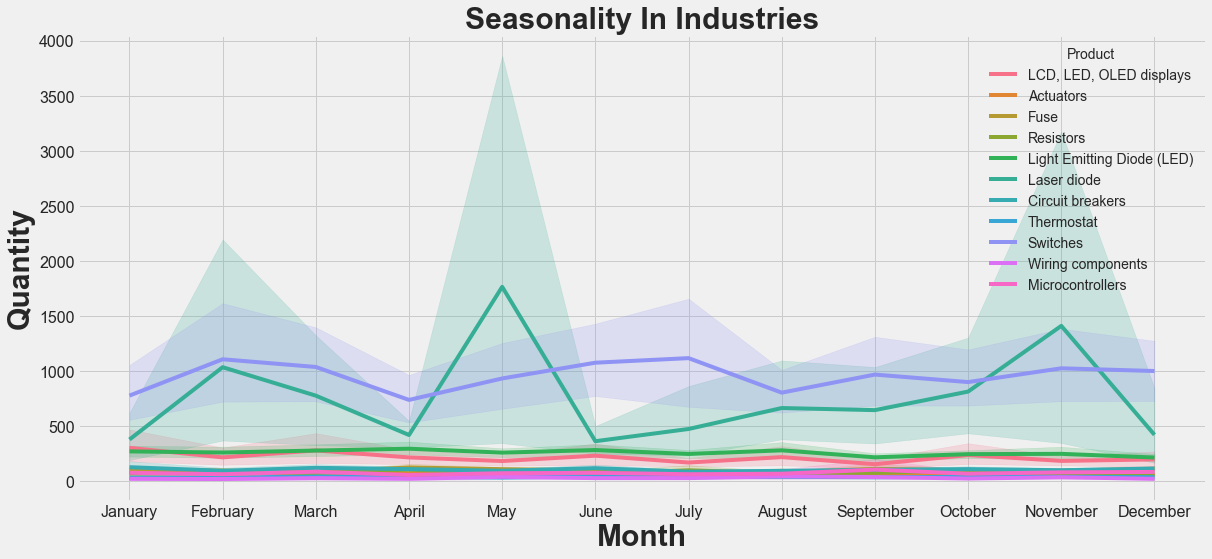

In [20]:
plt.style.use('fivethirtyeight')


y = df['Quantity']
x = df['Month']
hue = df['Product']

plt.figure(figsize=(18,8))
ax = sns.lineplot(x = x, y = y, data = df, hue = hue)

plt.yticks(size = 16)
plt.xticks(size = 16)
plt.xlabel('Month', size = 30, weight = 'bold')
plt.ylabel('Quantity', size = 30, weight = 'bold')
plt.title('Seasonality In Industries', size = 30, weight='bold');

**Laser diode** has seasonality and **Switches** has some signs of seasonality.          
I can assume that there are the best seasons to do testing or launching of new developed product, and they may need new components to fix something or build something new before next testing or launching season.

## Which segment yields the highest average profit margin?

I am going to add calculated field 'Net Profit Margin' so I can plot average profit margin.

In [21]:
df['Net Profit Margin'] = (df['Revenue (total)'] - df['Cost (total)']) / df['Revenue (total)']
df.head().T

,0,1,2,3,4
Date,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00
Customer ID,10318,10173,10217,10021,10041
Product,"LCD, LED, OLED displays",Actuators,Fuse,Resistors,Light Emitting Diode (LED)
State,Massachusetts,New Hampshire,Maine,Maine,New Jersey
Zip Code,2109,3084,4250,4544,7023
Business Type,Industrial,Industrial,Aerospace,Agriculture,Aerospace
Cost (per unit),2.06,0.55,2.215,1.575,1.725
Price (per unit),8.2,4.62,2.4,4.79,1.85
Quantity,33,22,11,479,510
Revenue (total),270.6,101.64,26.4,2294.41,943.5


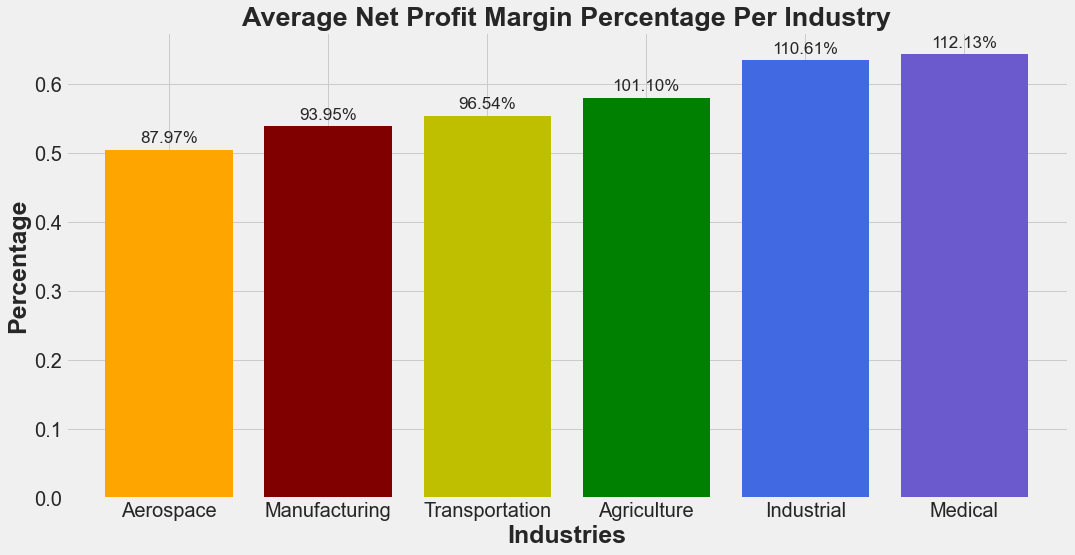

In [22]:
plt.style.use('fivethirtyeight')

total = df['Net Profit Margin'].mean()

color = ['orange','maroon','y','g','royalblue', 'slateblue']
ax =  df.groupby('Business Type')['Net Profit Margin'].mean().sort_values().plot.bar(color = color,
                                                                                     figsize = (16,8), width = 0.8)


for h in ax.patches:
    height = h.get_height()
    ax.text(h.get_x() + h.get_width() / 2, height + 0.01,'{:1.2f}'.format((height/total)*100) + '%',
            ha="center",size=17)


plt.yticks(size = 20)
plt.xticks(size = 20)
plt.xticks(rotation = 0) 

plt.xlabel('Industries', size = 25, weight='bold')
plt.ylabel('Percentage', size = 25, weight='bold')
plt.title('Average Net Profit Margin Percentage Per Industry', size = 27,weight = 'bold')
plt.show();

Even though **Aerospace** industry has the biggest number of orders and brings the biggest revenue among all the industries that company working in, it has the lowest average net profit margin.        

The **Medical** industry has the biggest percentage of average net profit margin, with pretty close second place **Industrial** segment

## Which products are driving the highest  and the lowest profit?

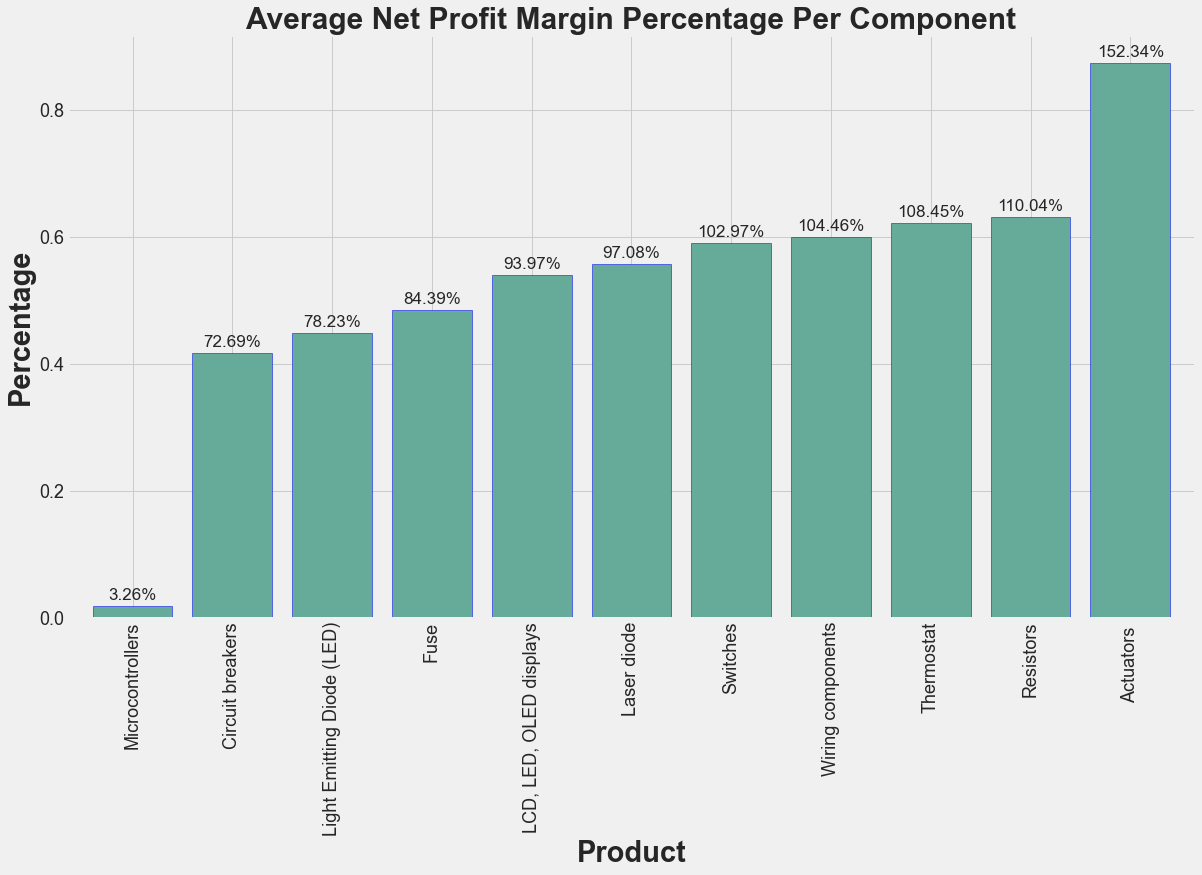

In [23]:
plt.style.use('fivethirtyeight')
total = df['Net Profit Margin'].mean()

dd = df.groupby('Product')['Net Profit Margin'].mean().sort_values().plot.bar(figsize = (18,10),color = '#66aa99',
                                                                          width = 0.8, edgecolor='blue')

for h in dd.patches:
    height = h.get_height()
    dd.text(h.get_x() + h.get_width() / 2, height + 0.01,'{:1.2f}'.format((height/total)*100) + '%',
            ha="center",size=17)


plt.yticks(size = 18)
plt.xticks(size = 18)

plt.ylabel('Percentage', size = 29, weight='bold')
plt.xlabel('Product', size = 29, weight='bold')
plt.title('Average Net Profit Margin Percentage Per Component', size = 30,weight = 'bold')
plt.show();

As we already know **Actuators** were second biggest component in terms of orders and it brings the most average profitability.    
On the other side **Microcontrollers** that has the smallest number of orders bring the least average profitability, only 3.26%.

# What is the geographic distribution of each segment?     

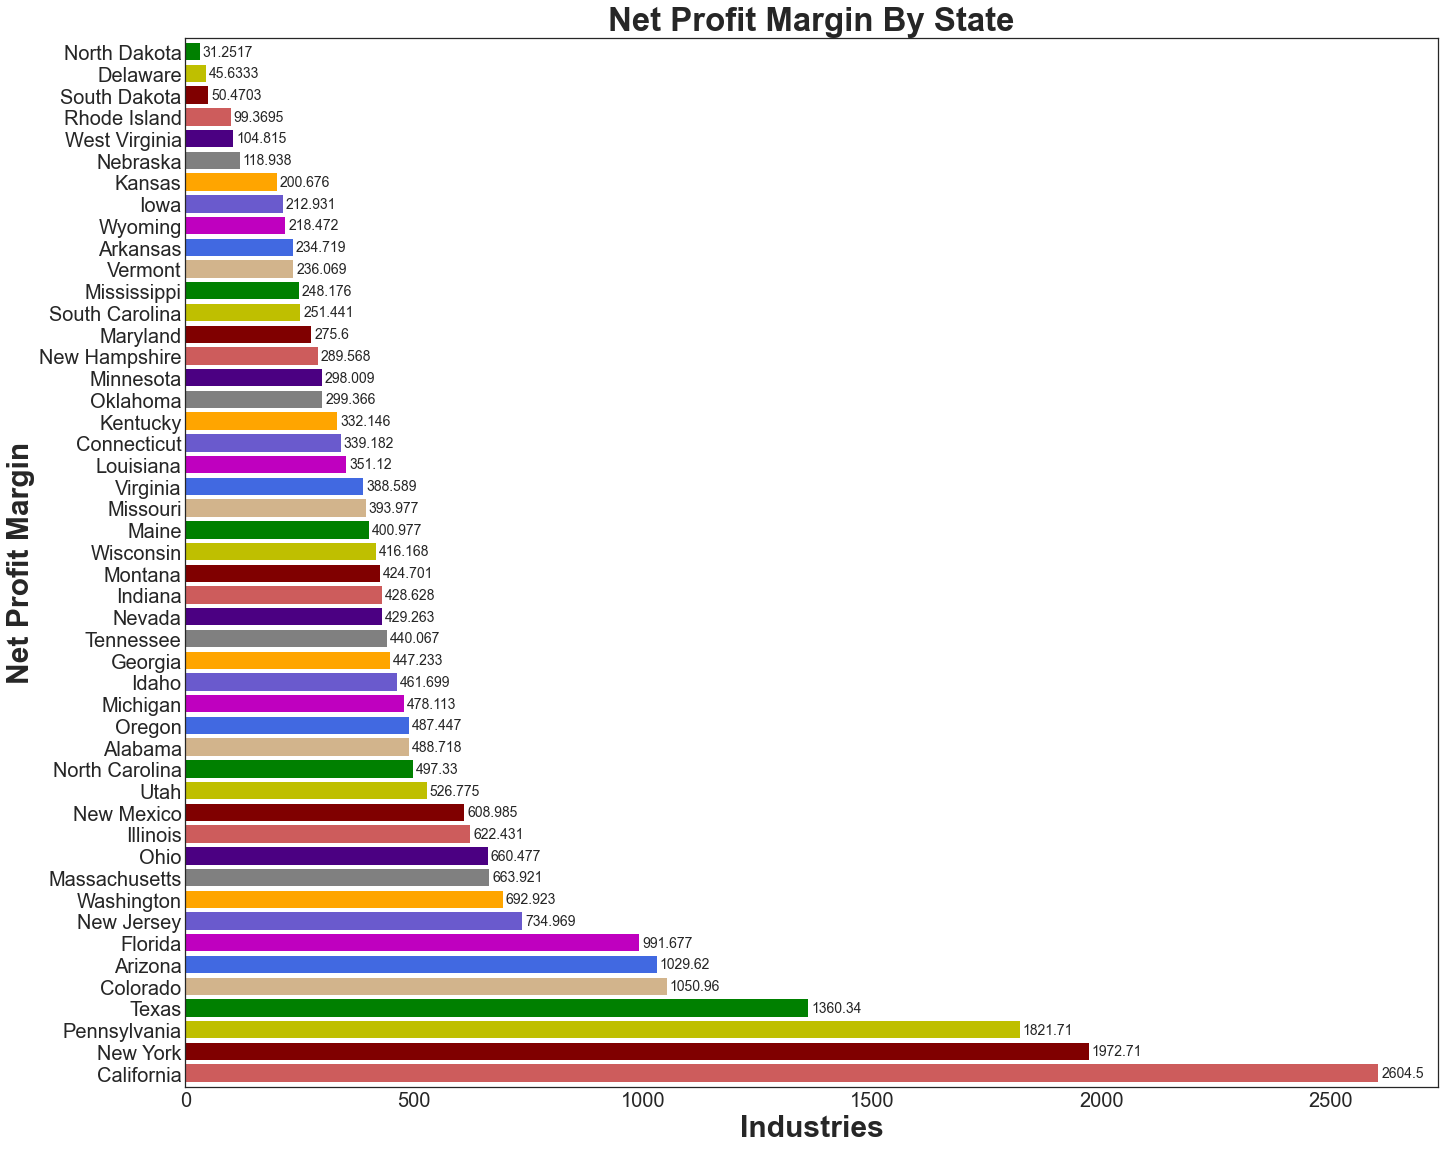

In [24]:
plt.style.use('seaborn-white')

color = ['indianred','maroon','y','g','tan','royalblue', 'm', 'slateblue','orange', 'gray', 'indigo']
ax = df.groupby('State')['Net Profit Margin'].sum().sort_values(ascending = False).plot.barh(color = color,
                                                                                     figsize=(20,18), width=0.8)

for bars in ax.containers:
    ax.bar_label(bars, padding=3)

plt.yticks(size = 20)
plt.xticks(size = 20)

plt.xlabel('Industries', size = 30, weight='bold')
plt.ylabel('Net Profit Margin', size = 30, weight='bold')
plt.title('Net Profit Margin By State', size = 33, weight='bold');
plt.show()

As we can see **California**, **New York**, **Pennsylvania** and **Texas** brings the bigest Net Profit Margin.
On the other end **North Dakota**, **Delaware** and **South Dakota** brings the list of Net Profit Margin.

## Which product has the highest growth potential?

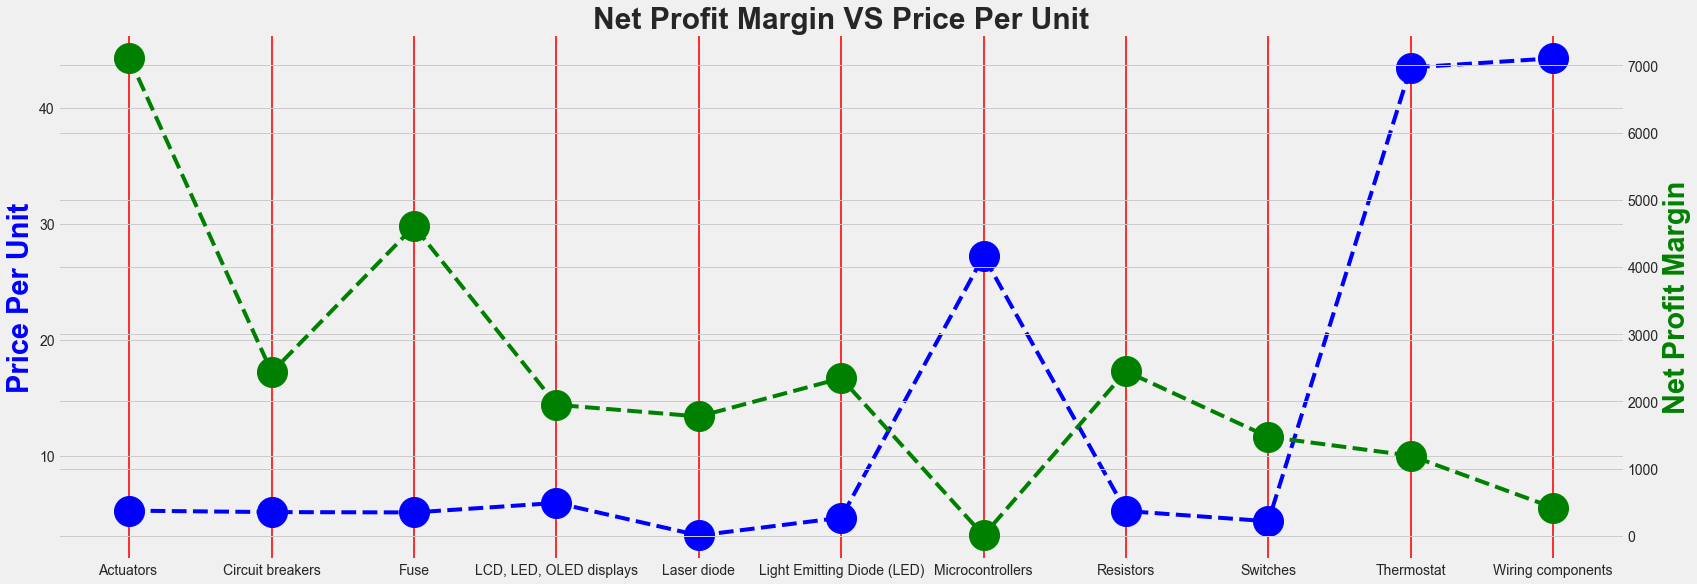

In [25]:
# plt.style.use('bmh')

plt.style.use('fivethirtyeight')

a = df.groupby(['Product'])['Price (per unit)'].mean()
b = df.groupby(['Product'])['Net Profit Margin'].sum()

fig, ax1 = plt.subplots(figsize = (25,9))
plt.grid(axis = 'x', color = 'r', alpha = 0.8, linewidth = 2)

ax1.plot(a, color = 'b',linestyle='dashed', marker='o', markersize=30, markerfacecolor='b')

ax2 = ax1.twinx()
ax2.plot(b,color = 'g', linestyle='dashed', marker='o', markersize=30, markerfacecolor='g')

ax1.set_ylabel('Price Per Unit', color = 'b', size = 29, weight='bold')
ax2.set_ylabel('Net Profit Margin', color = 'g', size = 29, weight='bold')
plt.title('Net Profit Margin VS Price Per Unit', size = 30,weight = 'bold')
plt.show();

As we can see **'Thermostat'**, **'Wiring components'** and **'Microcontrollers'** has the highest cost per unit and the lowest net profit margin among all the components.       
Lets take a closer look at the **'Microcontrollers'** this component has the biggest cost of production and the lowest net profit margin among all the components, only 3.26% as we know from previous plot.

**Actuators** and **Fuse** has the lowest cost of unit and the biggest net profit margin.

# Modeling

Encoding Categories

In [26]:
df.Product = LabelEncoder().fit_transform(df.Product)
df.State = LabelEncoder().fit_transform(df.State)
df['Business Type'] = LabelEncoder().fit_transform(df['Business Type'])

In [27]:
df.head().T

,0,1,2,3,4
Date,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00
Customer ID,10318,10173,10217,10021,10041
Product,3,0,2,7,5
State,18,26,16,16,27
Zip Code,2109,3084,4250,4544,7023
Business Type,2,2,0,1,0
Cost (per unit),2.06,0.55,2.215,1.575,1.725
Price (per unit),8.2,4.62,2.4,4.79,1.85
Quantity,33,22,11,479,510
Revenue (total),270.6,101.64,26.4,2294.41,943.5


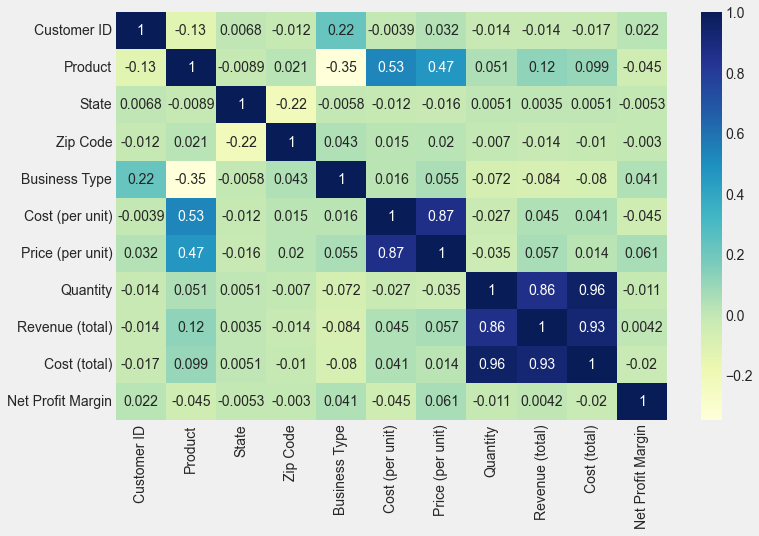

In [28]:
sns.heatmap(df.corr(), yticklabels=True, annot=True, cmap="YlGnBu")
plt.gcf().set_size_inches(11, 7)

In [39]:
df_d = df.drop(['Customer ID', 'Date','Zip Code', 'State', 'Month', 'Net Profit Margin'], axis=1)

In [40]:
for col in df_d.columns:
    print(col)

Product
Business Type
Cost (per unit)
Price (per unit)
Quantity
Revenue (total)
Cost (total)


In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score

In [32]:
import warnings
warnings.filterwarnings("ignore")

In [41]:
df_d.dtypes

Product               int32
Business Type         int32
Cost (per unit)     float64
Price (per unit)    float64
Quantity              int32
Revenue (total)     float64
Cost (total)        float64
dtype: object

# Logistic Regression

In [42]:
X = df_d.drop(columns = ['Product'])
y = df_d['Product']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

LR_mod = LogisticRegression(max_iter = 1000)

grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

LR_GS = GridSearchCV(LR_mod, grid, cv = None, n_jobs = -1)

LR_GS.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [43]:
print("tuned hpyerparameters :(best parameters) ",LR_GS.best_params_)

print("Accuracy :",LR_GS.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1}
accuracy : 0.9075302283560726


# Random Forest Classifier

In [69]:
# n_jobs=-1, to utilise all processors!
# cv=None, to use the default 5-fold cross validation.
# verbose=2, to display the score is also displayed.

X = df_d.drop(columns = ['Product'])
y = df_d['Product']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

RF_mod = RandomForestClassifier(n_estimators=100, min_samples_split = 4,max_depth = 40, n_jobs=-1)

RF_mod.fit(X_train, y_train)

predict = RF_mod.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100building tree 26 of 100

building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.4s


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100building tree 79 of 100

building tree 80 of 100
building tree 81 of 100building tree 82 

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


AttributeError: 'RandomForestClassifier' object has no attribute 'best_params_'

In [75]:
print('Random Forest: Accuracy=%.3f' % (accuracy_score(y_test, predict)))
print('Random Forest: f1-score=%.3f' % (f1_score(y_test, predict, average='weighted')))
print(f'Train Accuracy: {RF_mod.score(X_train, y_train):.3f}')
print(f'Test Accuracy: {RF_mod.score(X_test, y_test):.3f}')

Random Forest: Accuracy=1.000
Random Forest: f1-score=1.000


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s


Train Accuracy: 1.000
Test Accuracy: 1.000


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


6


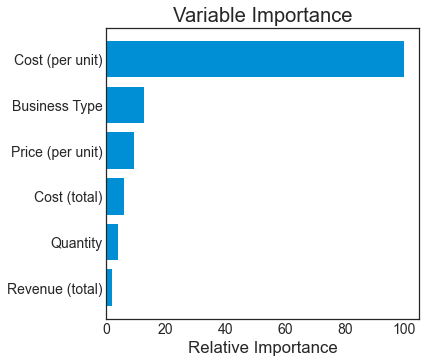

In [72]:
plt.style.use('seaborn-white')

feature_importance = RF_mod.feature_importances_

feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(5,5))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show();

# Summary

● **Actuators** brings the most average profitability.     
● **Actuators** and **Fuse** has the lowest cost of unit and the biggest net profit margin.     
● **Microcontrollers** has the smallest number of orders bring the least average profitability, only 3.26%.    
● **'Thermostat'**, **'Wiring components'** and **'Microcontrollers'** has the highest cost per unit and the lowest net profit margin.    
● **California**, **New York**, **Pennsylvania** and **Texas** brings the bigest Net Profit Margin.     
● **North Dakota**, **Delaware** and **South Dakota** brings the lowest Net Profit Margin.      
● **Microcontrollers** and **Wiring** components has the list of orders.     
● About 50% of all the industries belongs to the **Aerospace** (28.09%) and **Medical** (22.25%) industries.     
● **Aerospace** industry has the biggest number of orders and the brings the most revenue than the other industries all together.

# Recommendations

⚫ I would recommend to divest from **Microcontrollers** this component has the biggest cost of production and the lowest net profit margin only 3.26%.    
⚫

⚫ Promote components in **California**, **New York**, **Pennsylvania** and **Texas** 